<a href="https://colab.research.google.com/github/terrainthesky-hub/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Lesley_Rich_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [127]:
import numpy as np

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]


#James' code, just keeping it here for future reference
def get_var_std(x):
  sum = 0
  for i in x:
    sum += i
  length = 0
  for n in x:
    length += 1
  mean = sum / length
  numerator = 0
  for i in x:
    numerator += (i - mean)**2
  var = numerator / (length - 1)
  std = var**0.5
  print(f'Mean: {mean}, Sample Variance: {var}, Sample Stardard Deviation: {std}')


get_var_std(sales)

Mean: 3052.714285714286, Sample Variance: 214387.90476190473, Sample Stardard Deviation: 463.0204150595357


In [0]:


def mean(first_data_values):

    return sum(first_data_values) / len(first_data_values)

#list comprehension answer

def variance(values):

    meanval = mean(values)
    return mean([(i-meanval) ** 2 for i in values])

def std(values):

    return (variance(values)) ** (1/2)

In [0]:


def mean(x):
  return sum(x)/len(x)

def variance(x):
  x = np.array(x)
  mean = np.mean(x)
  distance = x - mean
  distance_squared = distance**2
  return distance_squared.sum()/(len(x)-1)

def std(x):
    return (variance(x)) ** (1/2)  



In [0]:
def variance(data):
  return ((data - np.mean(np.array(data)))**2).sum()/(len(data)-1)


#getting different answers with different variance functions I referenced from the QA
#The original variance list comprehension I found works the same as np.var, probably because it's not n-1

In [3]:
mean(sales)

3052.714285714286

In [125]:
variance(sales)



183761.06122448976

In [118]:
np.var(sales)

183761.06122448976

In [6]:
std(sales)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [16]:
import numpy as np
import pandas as pd

last_week_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers_entering_store = [127, 80, 105, 92, 120, 115, 93]


fake_data = {"last_week_sales": last_week_sales, "customers_entering_store": customers_entering_store,}


df = pd.DataFrame(fake_data)

df.cov()

,last_week_sales,customers_entering_store
last_week_sales,214387.904762,7604.357143
customers_entering_store,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
x_y = std(customers_entering_store) * std(last_week_sales)



In [0]:
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

In [18]:
std(last_week_sales)

428.67360686714756

In [33]:
7604.357143	/(std(customers_entering_store) * std(last_week_sales))

#not sure why i'm getting a different correlation coeficient.

1.1233063074718088

In [24]:
df.corr()

,last_week_sales,customers_entering_store
last_week_sales,1.000000,0.962834
customers_entering_store,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [35]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [36]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [37]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

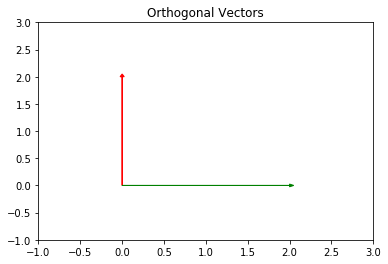

In [39]:
import matplotlib.pyplot as plt
#Perpendicular!

vector_1 = [0, 2]
vector_2 = [2, 0]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [40]:
#i drew it out by hand, and I think they are pointing in opposite directions but I don't think they're at 90 degree angles so not orthogonal.

TypeError: ignored

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [44]:
np.linalg.norm(c^2)

25.865034312755125

In [45]:
np.matmul(c, c)

665

In [47]:
c_trans = c.T

np.matmul(c_trans, c)

#the transverse times c is the same as the dot product of c and c, which is interesting

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}



Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])

f_norm = np.linalg.norm(f)

unit_vector = f/f_norm





# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

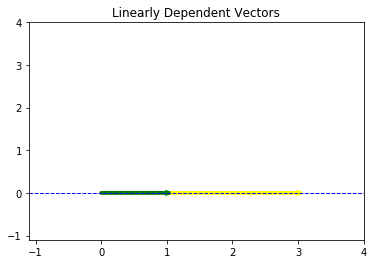

In [54]:
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)


v = [1,0] 


v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)


axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals


plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.title("Linearly Dependent Vectors")
plt.show()

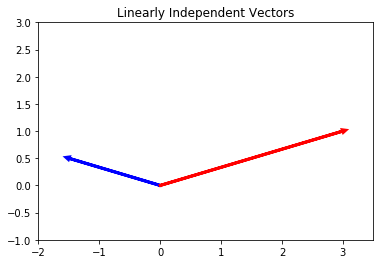

In [53]:



plt.xlim(-2,3.5)          
plt.ylim(-1,3)


a = [-1.5,.5] 
b = [3, 1]


plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# One of the vectors is redundant so all the real numbers in 1 dimension

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#none seem redundant so all real numbers in 3 dimensions

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



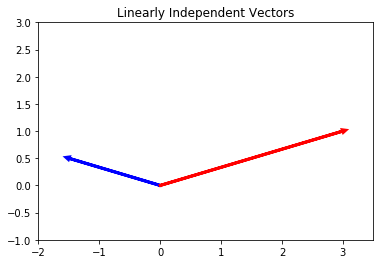

In [55]:


plt.xlim(-2,3.5)          
plt.ylim(-1,3)


a = [-1.5,.5] 
b = [3, 1]


plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors that are linearly indepdendent and span the vector space. Their linear combinations fill all the space in R2

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [128]:
a = np.array([1, 2, 3])
b = np.array([-1, 0,7])
c = np.array([4,8,2])



newb = a+b
newa = -4*a
newc = newa+c
newc
newa2 = -1/4*a
newa3 = newa2*-4
newa3

ValueError: ignored

In [97]:
newa4 = newa3 - newb
newa5 = newa4 + newc2
newa5

array([1., 0., 1.])

In [112]:
newb2 = newb/2
newb3 = newb2 + newc3
newb3

array([ 0.,  1., -1.])

In [110]:
newc2 = newc * -.8
newc3 = newc2 * -.75
newc3

array([ 0.,  0., -6.])

In [107]:
#Jesus gaussian elimination is hard... uhhh I think it has a rank of 3 because I don't think there's any redundant columns.

0.75

In [133]:
matrix = np.array([[1,2,3],
                  [-1,0,7],
                  [4,8,2]])

np.linalg.matrix_rank(matrix)

#yup, 3

3

## 7.2 What does the rank of a matrix tell us?

Showing us the dimensions it spans

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()